# Basic Supply Chain Construction
This notebook shows how to create some basic supply chain layouts using the predefined classes.

In [1]:
from prisk.asset import OilExtractionPlant, OilRefinery, SteelPlant, Capacity, Inventory
from prisk.demand import Demand
from prisk.firm import Firm
from prisk.kernel import Kernel
from prisk.relationships import SupplyChainRelation

import numpy as np

np.random.seed(1234)

For now, we just work with some hypothetical assets and some hypothetical relations between them.

In [2]:
default_capacity = Capacity(maximum=1200, constrained=1200, current=1000)


asset_a = OilExtractionPlant(
    name="Oil Extraction Plant",
    latitude=0,
    longitude=0,
    flood_damage_curve=[],
    flood_exposure=[],
    flood_protection=0,
    replacement_value=1000,
    capacity=Capacity(maximum=250, constrained=250, current=200),
    inventory=Inventory(maximum=500, current=200, desired=200)
)

asset_g = OilExtractionPlant(
    name="Oil Extraction Plant 2",
    latitude=0,
    longitude=0,
    flood_damage_curve=[],
    flood_exposure=[],
    flood_protection=0,
    replacement_value=1000,
    capacity=Capacity(maximum=100, constrained=100, current=70),
    inventory=Inventory(maximum=500, current=200, desired=200)
)

asset_b = OilRefinery(
    name="Oil Refinery",
    latitude=0,
    longitude=0,
    flood_damage_curve=[],
    flood_exposure=[],
    flood_protection=0,
    replacement_value=1000,
    capacity=Capacity(maximum=300, constrained=300, current=250),
    inventory=Inventory(maximum=1000, current=700, desired=700)
)

asset_f = OilRefinery(
    name="Oil Refinery 2",
    latitude=0,
    longitude=0,
    flood_damage_curve=[],
    flood_exposure=[],
    flood_protection=0,
    replacement_value=1000,
    capacity=Capacity(maximum=250, constrained=250, current=200),
    inventory=Inventory(maximum=500, current=200, desired=200)
)

asset_c = SteelPlant(
    name="Steel Plant 1",
    latitude=0,
    longitude=0,
    flood_damage_curve=[],
    flood_exposure=[],
    flood_protection=0,
    replacement_value=1000,
    capacity=Capacity(maximum=360, constrained=360, current=300),
    inventory=Inventory(maximum=2000, current=1000, desired=1000)
)

asset_d = SteelPlant(
    name="Steel Plant 2",
    latitude=0,
    longitude=0,
    flood_damage_curve=[],
    flood_exposure=[],
    flood_protection=0,
    replacement_value=1000,
    capacity=Capacity(maximum=360, constrained=360, current=300),
    inventory=Inventory(maximum=2000, current=1000, desired=1000)
)

asset_e = SteelPlant(
    name="Steel Plant 3",
    latitude=0,
    longitude=0,
    flood_damage_curve=[],
    flood_exposure=[],
    flood_protection=0,
    replacement_value=1000,
    capacity=Capacity(maximum=360, constrained=360, current=300),
    inventory=Inventory(maximum=2000, current=1000, desired=1000)
)

demand = Demand(0, 0, 0)
demand_steel = Demand(300, 300, 300)

firm_a = Firm(name="Oil Extraction", final_demand=demand); firm_a.add_asset(asset_a, ownership=1)
firm_b = Firm(name="Oil Refinery + Extraction", final_demand=demand); firm_b.add_asset(asset_b, ownership=1)
firm_b.add_asset(asset_g, ownership=1)
firm_c = Firm(name="Steel 1", final_demand=demand_steel); firm_c.add_asset(asset_c, ownership=1)
firm_d = Firm(name="Steel 2", final_demand=demand_steel); firm_d.add_asset(asset_d, ownership=1)
firm_e = Firm(name="Steel 3", final_demand=demand_steel); firm_e.add_asset(asset_e, ownership=1)
firm_f = Firm(name="Oil Refinery 2", final_demand=demand); firm_f.add_asset(asset_f, ownership=1)

Once we have the firms, we can extract the supply chain relations between them:

In [3]:
firm_f.products

{'refined oil'}

In [4]:
SupplyChainRelation(client=firm_b, supplier=firm_a, product="crude oil", recipe_input=0.5)
SupplyChainRelation(client=firm_c, supplier=firm_b, product="refined oil", recipe_input=0.2)
SupplyChainRelation(client=firm_d, supplier=firm_b, product="refined oil", recipe_input=0.3)
SupplyChainRelation(client=firm_d, supplier=firm_f, product="refined oil", recipe_input=0.3)
SupplyChainRelation(client=firm_e, supplier=firm_b, product="refined oil", recipe_input=0.2)
SupplyChainRelation(client=firm_c, supplier=firm_a, product="crude oil", recipe_input=0.3);

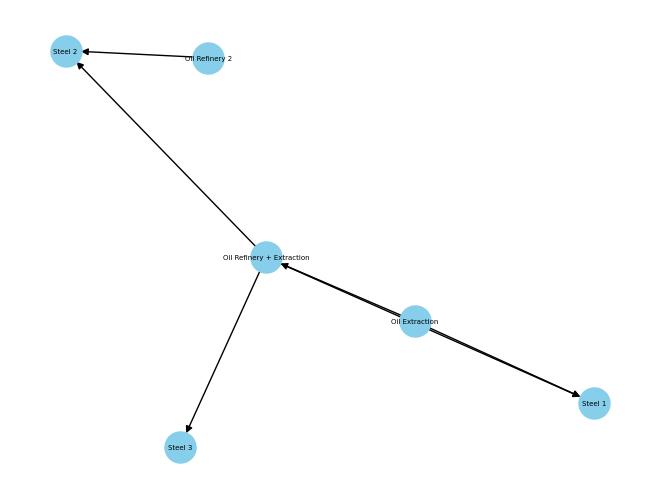

In [5]:
SupplyChainRelation.visualize()

In [6]:
from prisk.portfolio import Portfolio
firms = [firm_a, firm_b, firm_c, firm_d, firm_e, firm_f]

portfolio = Portfolio("Portfolio")
nav = 1
for firm in firms:
    portfolio.add_position(firm, nav/(len(firms)*firm.npv)) 

start_value = portfolio.underlying_value  

In [7]:
asset = firm_d.assets[0]
print(asset.recipe)
print(firm_d.inventory)
print(firm_d.desired_inventory)
print(asset.input_inventory)


{'refined oil': 0.6}
{'steel': 1000}
{'steel': 1000}
{'refined oil': np.float64(1080.0)}


### Simulation
The simulation is done using the same Kernel as the regular p-risk version:

In [8]:
simulation = Kernel(
    assets=[asset_a, asset_b, asset_c, asset_d, asset_e, asset_f, asset_g],
    insurers=[]
)
simulation.run(500)

### Monte Carlo

Oil Extraction


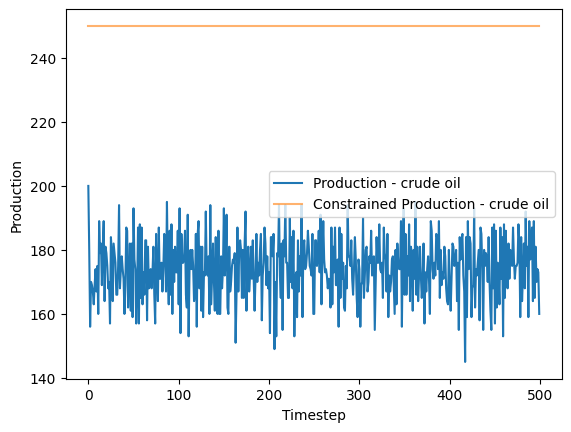

Oil Refinery + Extraction


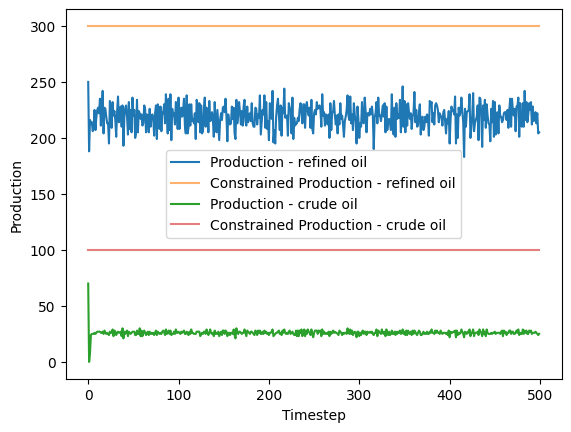

Steel 1


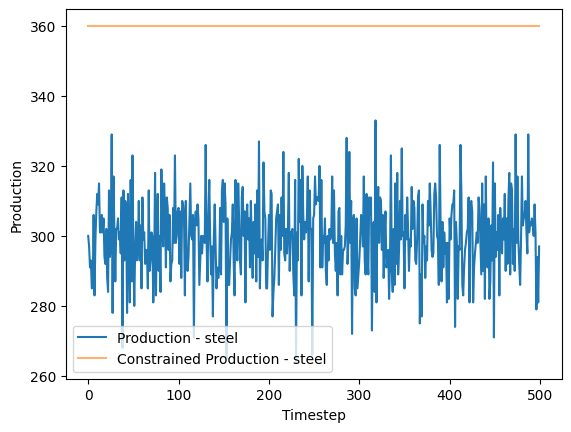

Steel 2


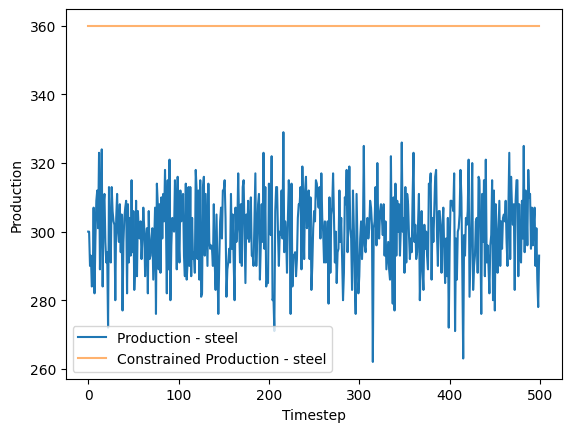

Steel 3


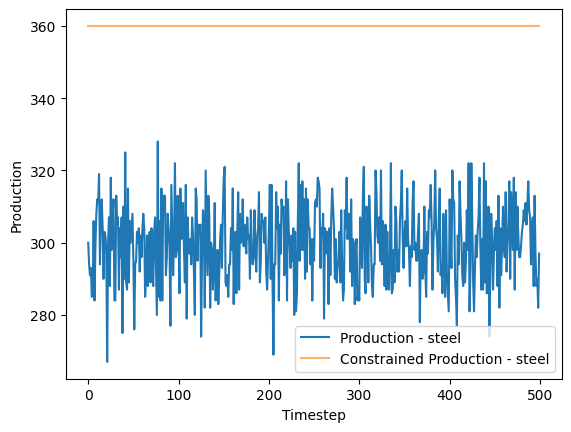

Oil Refinery 2


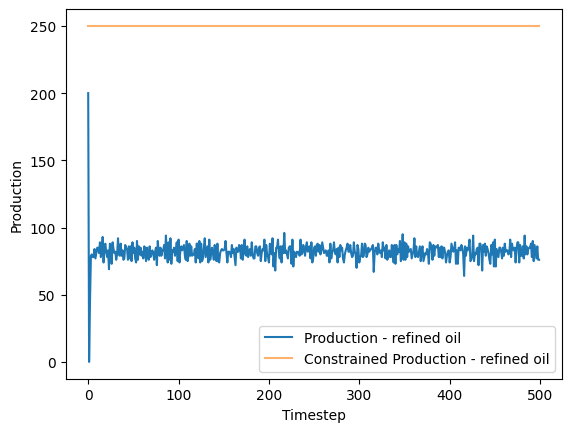

In [9]:
for firm in firms:
    print(firm)
    #firm.visualize_inventory_history()
    firm.visualize_production_history()